<h1 align='center'>
    Jacobiano do Manipulador SCARA
<h1>

<div align="center">
    <img src="SCARA.png">
</div>

In [1]:
import numpy as np
from FKM import *

### Definição da Tabela de Denavit Hartenberg:

In [2]:
scara = Robot((
    [theta1, l1, l2, 0],
    [theta2, 0, l3, rad(180)],
    [0, d3+l4, 0, 0],
    [theta4, l5, 0, 0],
))

### $$\text{Obtenção de } o_i^0 \text{ :}$$

In [3]:
n = len(scara.T) #número de juntas

o = [Matrix([[0], [0], [0]])]
for i in range(1, n+1):
    o.append(scara.HTM(0, i)[:3, 3])

o

⎡⎡0⎤  ⎡c₁⋅l₂⎤  ⎡c₁⋅l₂ + c₁₂⋅l₃⎤  ⎡c₁⋅l₂ + c₁₂⋅l₃⎤  ⎡c₁⋅l₂ + c₁₂⋅l₃⎤⎤
⎢⎢ ⎥  ⎢     ⎥  ⎢              ⎥  ⎢              ⎥  ⎢              ⎥⎥
⎢⎢0⎥, ⎢l₂⋅s₁⎥, ⎢l₂⋅s₁ + l₃⋅s₁₂⎥, ⎢l₂⋅s₁ + l₃⋅s₁₂⎥, ⎢l₂⋅s₁ + l₃⋅s₁₂⎥⎥
⎢⎢ ⎥  ⎢     ⎥  ⎢              ⎥  ⎢              ⎥  ⎢              ⎥⎥
⎣⎣0⎦  ⎣ l₁  ⎦  ⎣      l₁      ⎦  ⎣-d₃ + l₁ - l₄ ⎦  ⎣-d₃ + l₁ - l₄ ⎦⎦

### $$\text{Obtenção de } Z_{i-1}^0 = R_{i-1}^0k \text{ :}$$

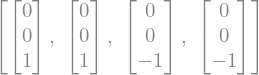

In [4]:
z = [Matrix([[0], [0], [1]])]
for i in range(1, n):
    z.append(scara.HTM(0, i)[:3, 2])

z

### $$\text{Obtenção do Jacobiano de velocidades lineares } J_{v_i} = z_{i-1}^0 \times \left( o_n^0 - o_{i-1}^0 \right) \text{ :}$$

In [5]:
jv = []
for i in range(1, n+1):
    if(scara.rotational[i-1]):
        jv.append(Matrix(np.cross(np.squeeze(z[i-1]), np.squeeze(o[-1] - o[i-1])).tolist()))
    else:
        jv.append(z[i-1])

jv

⎡⎡-l₂⋅s₁ - l₃⋅s₁₂⎤  ⎡-l₃⋅s₁₂⎤  ⎡0 ⎤  ⎡0⎤⎤
⎢⎢               ⎥  ⎢       ⎥  ⎢  ⎥  ⎢ ⎥⎥
⎢⎢c₁⋅l₂ + c₁₂⋅l₃ ⎥, ⎢c₁₂⋅l₃ ⎥, ⎢0 ⎥, ⎢0⎥⎥
⎢⎢               ⎥  ⎢       ⎥  ⎢  ⎥  ⎢ ⎥⎥
⎣⎣       0       ⎦  ⎣   0   ⎦  ⎣-1⎦  ⎣0⎦⎦

### $$\text{Obtenção do Jacobiano de velocidades angulares } J_{\omega_i} = z_{i-1}^0 \text{ :}$$

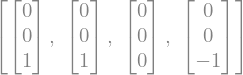

In [6]:
jw = []
for i in range(1, n+1):
    if(scara.rotational[i-1]):
        jw.append(z[i-1])
    else:
        jw.append(Matrix([[0], [0], [0]]))

jw

### $$\text{Obtenção do Jacobiano de velocidades completo, tal que } \xi = J(q)\dot{q} \text{ :}$$

In [7]:
J = []
for k in range(3):
    J.append([])
    for i in range(n):
        J[k].append(jv[i][k])
for k in range(3):
    J.append([])
    for i in range(n):
        J[k+3].append(jw[i][k])

Matrix(J)

⎡-l₂⋅s₁ - l₃⋅s₁₂  -l₃⋅s₁₂  0   0 ⎤
⎢                                ⎥
⎢c₁⋅l₂ + c₁₂⋅l₃   c₁₂⋅l₃   0   0 ⎥
⎢                                ⎥
⎢       0            0     -1  0 ⎥
⎢                                ⎥
⎢       0            0     0   0 ⎥
⎢                                ⎥
⎢       0            0     0   0 ⎥
⎢                                ⎥
⎣       1            1     0   -1⎦